# Simulating distributions

Let's talk how to simulate distributions in R. Why would you want to do that? A few particularly salient reasons:

* You can use simulations to test whether your analysis pipeline is working the way that you think it is
* You can use simulations to perform power analyses (as we'll get into later) 
* From an educational perspective, simulations can help you to understand the properties of different families of distributions. 

---
## Random variables
Consider the _ith_ observation of a variable that we have labeled $x$. We shall call this observation $x_i$.

Formally we say that $x_i$ is a *random variable*, which means that it is a sample taken a particular probability distribution. Thus $x_i$ is a unique observation whose fundamental properties are determined by the underlying distribution that it was sampled from. 

Let's consider an example.


In [ ]:
x <- rnorm(1)
x

[1] -0.871759

In this case we said that $x$ was pulled from a particular random distribution called a _normal distirbution_. It is just a single number, but its underlying nature is determined by the nature of the normal distribution itself.

---
## The Normal (Gaussian) Distribution

In the example above, $x_i$ was sampled from a _Gaussian distribution_, also called a _normal distrubtion_ or a _bell curve_. The normal distribution has two parameters that define its shape:

* mean: $\mu = \frac{1}{n} \sum_i^{n} x_i$
* standard deviation: $\sigma = \sqrt{\frac{1}{n} \sum_i^{n} (x_i - \mu)^2} $

Thus when we want to say that $x_i$ is sampled (or "pulled") from a normal distribution with a particular mean and standard deviation we'll write it this way.

$$ x \sim N(\mu, \sigma) $$

Sometimes we call the _mean_ the "expectation" of the distribution and it is written as $E(x)$. We will see both forms throughout the semester.

The normal probability distribution function is

$$ f(x) = \frac{1} {{\sigma \sqrt {2\pi } }} e^{{\frac{ - ( {x - \mu })^2 }{2\sigma^2} }} $$

This particular function will be important later, particularly as we get to linear regression. But right now there are a few things to take away from this equation.

* The _exponential_ term puts it in a class of distributions known as the _exponential family_. 
* The $\mu$ is the most likely expected value of this distribution (hence calling it an "expectation").
* The $\sigma$ defines the range of values about the mean that have the highest probability of being observed.

The particular values for $\mu$ and $\sigma$ will determine the scale and position of a normal distribution but, importantly, **not** its shape. In the example code above, we sampled $x_i$ from a normal distribution with $\mu=0$ and $\sigma=1$. This is sometimes better known as the *standard normal distribution*.

Let's take a second to look at the shape of the normal distribution.

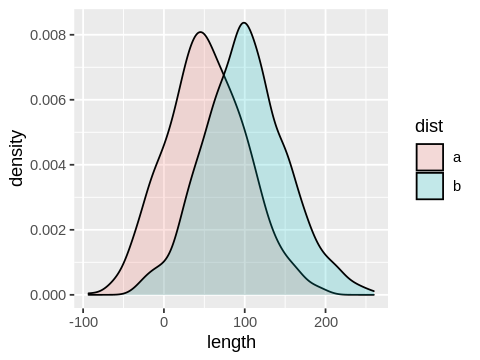

In [ ]:
#install.packages("ggplot2") # If you haven't installed ggplot2, uncomment this line the first time you run
library(ggplot2) # Lets use ggplot for these
options(repr.plot.width=4, repr.plot.height=3) # This just makes the figure display manageable 

# Simulating 2 distributions of 1000 random variables each
n = 1000
mu_a = 50  # mean
mu_b = 100 # mean
sigma_a = 50 # standard deviation
sigma_b = 50 # standard deviation

# Generate the distributions as data frames
a = data.frame(length=rnorm(n, mean=mu_a, sd=sigma_a))
b = data.frame(length=rnorm(n, mean=mu_b, sd=sigma_b))
a$dist = 'a' # label
b$dist = 'b' # label

# Plot the probability distribution functions
dat=rbind(a,b)
ggplot(dat, aes(length, fill = dist)) + geom_density(alpha = 0.2)

Notice how the overall shape of the two  distributions is roughly the same, they're just shifted based on the different means.

Let's now play with the standard deviation of distribution *b*.

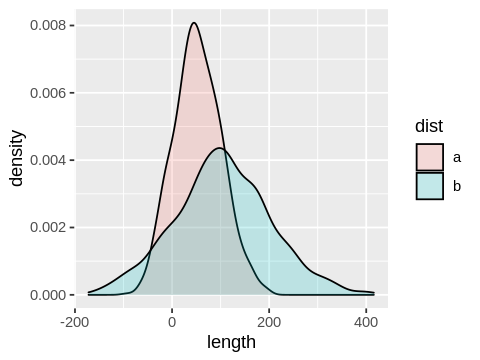

In [ ]:
sigma_b = 100
b = data.frame(length=rnorm(n, mean=mu_b, sd=sigma_b))
b$dist = 'b'

dat=rbind(a,b)
ggplot(dat, aes(length, fill = dist)) + geom_density(alpha = 0.2)

You get the basic point. The _mean_ sets the center of the distribution, while the _variance_ determins its width. The fact that the overall shape of the normal distribution doesn't change with $\mu$ and $\sigma$ (as opposed to other probability distributions we will discuss below) make the normal distribution a highly useful tool in statistics.

---
## The Law of Large Numbers

Notice that in the example above, the distributions aren't perfect. They have some "uneveness" in theeir shape. This is because, with only 1000 observations, we don't have enough data to get a precise reflection of the true $\mu$ and $\sigma$.

This takes us to the first statistical law of the class.

__The Law of Large Numbers (LLN):__ As the number of observations of a random process increases, the percentage difference between the expected and actual values goes to zero.

The LLN is one of the most fundamental laws in statistics and is highly relevant for how we use statistics in our research. It means that as you accumulate samples or observations, the distributional properties of the sample will converge to the true distributional properties of the underlying distribution they were sampled from. This is precisely why larger sample sizes are preferred: _the greater the number of observations, the more certain you are that the observed means, variances, etc. are an accurate reflection of the real values._

Let's consider the LLN by example by simulating three different samples of cognitive scores that are "collected" from three studies with different sample sizes.


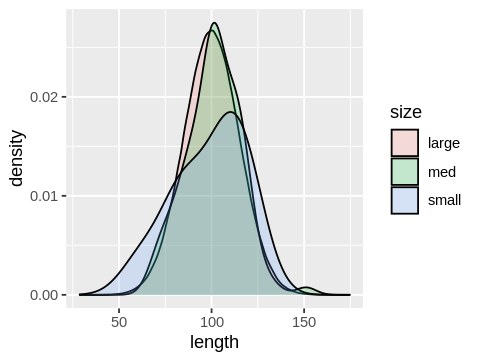

In [ ]:
# Here we will simulate 3 sample distributions of different sizes, but same means & variances
mu       = 100
sigma    = 15
n_small  = 10
n_med    = 100
n_large  = 1000000

# Make new samples as data frames
small = data.frame(length=rnorm(n_small, mean=mu, sd=sigma))
med   = data.frame(length=rnorm(n_med, mean=mu, sd=sigma))
large = data.frame(length=rnorm(n_large, mean=mu, sd=sigma))
small$size = 'small' 
med$size = 'med' 
large$size = 'large'

# plot
dat=rbind(small,med, large)
ggplot(dat, aes(length, fill = size)) + geom_density(alpha = 0.2)

Notice how the distribution gets smoother as the sample size increases. They all should reflect random variability from the _same distribution_ (i.e., $x \sim N(100,15)$), but clearly they don't. To get a better look at the LLN effect, let's compare the medium sample and large sample distributions individually.

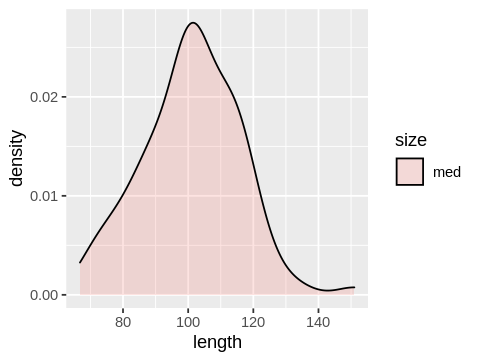

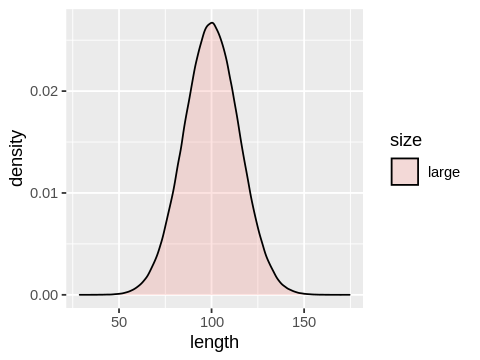

In [ ]:
ggplot(med, aes(length, fill = size)) + geom_density(alpha = 0.2)
ggplot(large, aes(length, fill = size)) + geom_density(alpha = 0.2)                                                   

Here you can clearly see how increasing the number of observations provides a more reliable reflection of the true underlying distributional parameters.

---
# Non-normal distributions

The example above gives you a taste of the normal distribution. But that is not the only distribution type we will see over the course of the semester. Here are a few different types of distributions we will encounter. First we will go over their properties and then see what they look like.

<br>

## Uniform Distribution
All observations across a range from _a_ (min) to _b_ (max) are equally likely to occur. We denote a random variable from a uniform distribution as $ x \sim U(a,b) $

The properties of the uniform distribution are.

* $ P(x) = \frac{1}{b-a}, \quad a < x < b $

* $\mu = \frac{1}{2} (a + b) $

* $\sigma = \sqrt{\frac{1}{12} * (b-a)^2} $

For example, the probability of getting any number on a dice roll is described by a uniform distribution. Let's simulate 10,000 dice rolls.


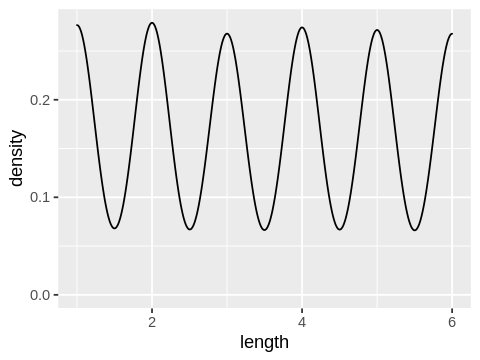

In [ ]:
a = 0
b = 6
n = 10000

dat = data.frame(length=ceiling(runif(n, min=a, max=b)))
ggplot(dat, aes(length)) + geom_density(alpha = 0.2)


Since this is such a discrete function (there are only 6 possible that you can get), a histogram is probably a better way of visualizing this function.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



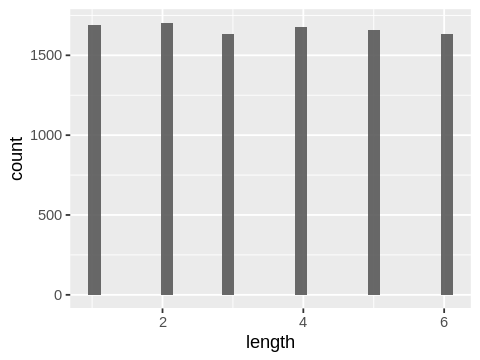

In [ ]:
ggplot(dat, aes(length)) + geom_histogram(alpha = 0.9)

Notice that here you can clearly see that, as you'd expect, the probability of getting any value between 1 and 6 is equally likely.

## Exponential distribution

Here values fall off quickly (i.e., non-linearly) from a baseline value. We denote a random variable from an exponential distribution as $ x \sim exp(\lambda) $

The properties of the exponential distribution are.

* $ P(x) = \lambda e^{- \lambda x} $

* $\mu = \frac{1}{\lambda} $

* $\sigma = \sqrt{\frac{1}{\lambda^2}} $

The parameter $\lambda$ is often referred to as the _rate_ of the function, and reflects the efficiency of the fall off. 

In psychology & neuroscience, one of the most common places we come across exponential functions is with learning curves (i.e., errors fall off exponentially with practice). Let's consider a few different exponential distributions with different rate terms.



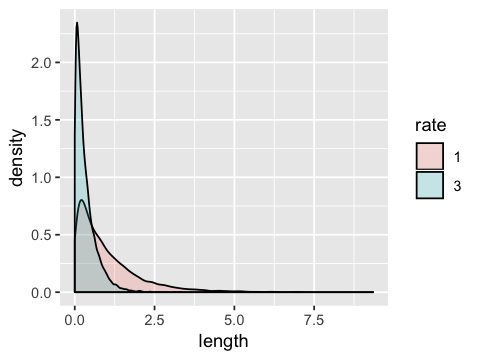

In [ ]:
lambda_a = 1 # A slower rate
lambda_b = 3 # A faster rate
n = 10000

a = data.frame(length=rexp(n, rate=lambda_a))
b = data.frame(length=rexp(n, rate=lambda_b))

a$rate = '1'
b$rate = '3'
dat = rbind(a,b)
ggplot(dat, aes(length, fill=rate)) + geom_density(alpha = 0.2)


Notice how the higher $\lambda$ leads to a steeper decrease in values.

## The Chi-Squared ($\chi^2$) Distribution

The $\chi^2$ distribution is probably one of the trickiest probability distributions we will encounter this semester (_Note:_ This is not the same thing as the $\chi^2$ test, but they are related). It is heavily skewed but dramatically changes its shape based on the degrees of freedom ($k$) you give it. We denote a random variable pulled from a $\chi^2$ distribution as $x \sim \chi^2(k)$

The properties of the $\chi^2$ distribution are.

* $ P(x) = \frac{1}{2^{\frac{k}{2}} \Gamma(\frac{k}{2})} x^{\frac{k}{2-1}} e^{\frac{-x}{2}} $

* $\mu = k$

* $\sigma = \sqrt{2k}$

Note that in the proability distribution function, the term $\Gamma()$ denotes a [Gamma function](https://en.wikipedia.org/wiki/Gamma_function), where $\Gamma(n) = (n-1)!$ (e.g., if n = 4, then $\Gamma(4)= 3*2*1$)

We often encounter the $\chi^2$ distribution as a good descriptor of non-normal distributions, particularly if they are bounded by a particular value. Let's see how varying the degrees of freedom $k$ impacts the distribution shape here.


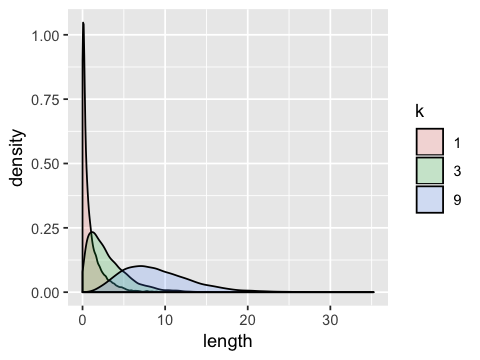

In [ ]:
k_a = 1 
k_b = 3 
k_c = 9 
n = 10000

a = data.frame(length=rchisq(n, df=k_a))
b = data.frame(length=rchisq(n, df=k_b))
c = data.frame(length=rchisq(n, df=k_c))

a$k = '1'
b$k = '3'
c$k = '9'

dat = rbind(a,b,c)
ggplot(dat, aes(length, fill=k)) + geom_density(alpha = 0.2)

Notice how setting $k=1$ makes this look an awful lot like an _exponential distribution_? That's because the $\chi^2$ distribution comes from the same family of distrubtions. You guessed it... the _exponential family_ (just like the Normal distribution).

---
# QQ plots

Now that we have gone over a few different distribution types that you'll encounter this semester, you may be left wondering "How do I know if my data really comes from a particular distribution?" For example, if you are using a statistical test that assumes that your data is normally distributed, how can you check to see if it is?

While there are many statistical tests that will tell you to what degree your data fits a particular distribution (or some built in tools in R to try to tell you what distribution your data might come from), there is a quick visualization method to see whether your data arise from a specific distribution.

The _quantile-quantile (QQ) plot_ is a graphical technique for determining if an observed data set comes from a specific sampling distribution. It works by plotting the sorted distribution of your observed data, against a sorted random sample pulled from a specific theoretical distribution. 

Let's consider this by example. Below we will compare two "observed" data vectors (one pulled from a normal distribution and one pulled from a $\chi^2$ distribution) against the assumption that they both came from a normal distribution.


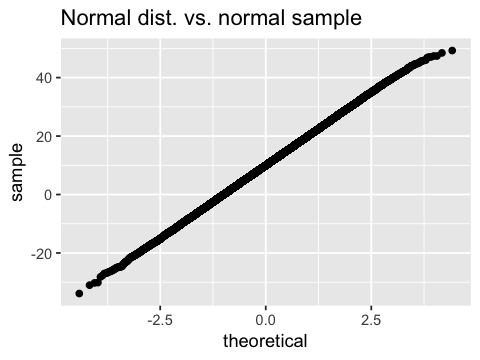

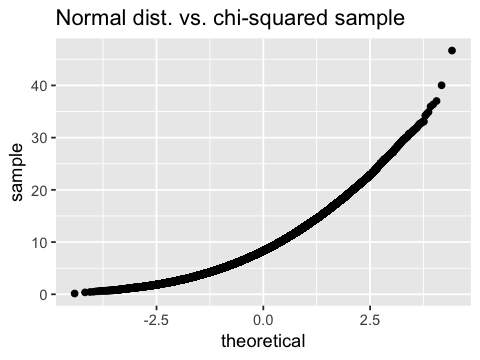

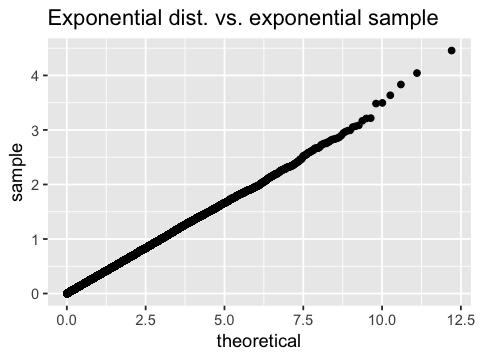

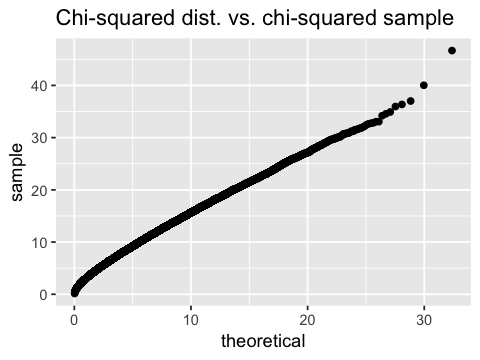

In [ ]:
# Let's create two distributions: one normal, one chi-square
n = 100000
norm_df = data.frame(length=rnorm(n, mean=10, sd=10))
chi_df = data.frame(length=rchisq(n, df=9))
exp_df = data.frame(length=rexp(n,rate=3))

# Test against a theoretical normal distribution for both x & y
# Note that the sample should = length (the variable name), not the dataframe name 
ggplot(norm_df, aes(sample=length)) + geom_point(stat = "qq") + ggtitle("Normal dist. vs. normal sample")
ggplot(chi_df, aes(sample=length)) + geom_point(stat = "qq") + ggtitle("Normal dist. vs. chi-squared sample")

#a more straightforward way to plot qq plots with a wide range of choices for theoretical distributions
# ggplot(norm_df, aes(sample=length)) + stat_qq(distribution = qnorm) + ggtitle("Normal dist. vs. normal sample") #testing against a normal distribution
ggplot(exp_df, aes(sample=length)) + stat_qq(distribution = qexp) + ggtitle("Exponential dist. vs. exponential sample") #testing against an exponential distribution
ggplot(chi_df, aes(sample=length)) + stat_qq(distribution = qchisq, dparams = list(df = 5)) + ggtitle("Chi-squared dist. vs. chi-squared sample")#testing against against the chi-squared distribution

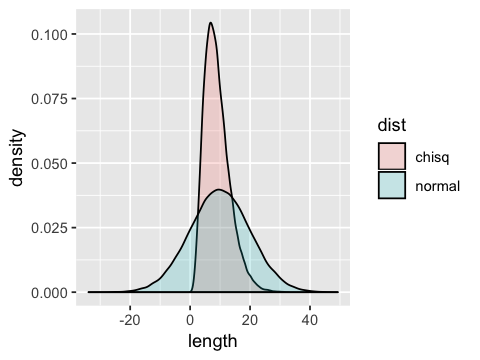

In [ ]:
# # Now let's just look at the distribution of these two vectors as we have before
x=norm_df
x$dist = 'normal'

y=chi_df
y$dist = 'chisq'
dat = rbind(x,y)
ggplot(dat, aes(length, fill=dist)) + geom_density(alpha = 0.2)

There are a few things to notice here. 

* First, the QQ-plot for $x$ (which actually came from a normal distribution) is practically a straight line. Some of the observations at the tails may not fall exactly on the line, but it's pretty close.

* Second, the QQ-plot for $y$ (which was sampled from a $\chi^2$ distribution) is not a straight line, but curved. The more that you see a QQ-plot deviate from a straight line, the less likely it is that your observed distribution was sampled from that specific theoretical distribution.

* Finally, notice that if we qualitatively plotted $x$ and $y$ against each other as distributions, this subtle difference in their shape would not be as apparent as what is seen in the QQ-plot.

Thus, QQ-plots offer a quick and efficient way of checking the sampling distribution of your data. We will be coming back to these plots throughout the semester.


*notebook authored by Ven Popov and edited by Krista Bond, Charles Wu, and Patience Stevens*